## Ex 4.1

_Calculate the number of minutes between today and the beginning of 2018_.

In [25]:
# Your answer
import datetime as dt
now = dt.datetime.now()
back = dt.datetime(year=2018, month=1, day=1)

(now - back).total_seconds()//60

2297693.0

## Ex 4.2

_Calculate the monthly return and volatility for the stock Tesla (TSLA), and plot them. For the volatility, apply a rolling window of 20._

In [28]:
# Your answer
import yfinance as yf
import matplotlib.pyplot as plt

df = yf.download("TSLA")
df.head()

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [29]:
df["pct_change"] = df["Adj Close"].pct_change()
df.head()

,Open,High,Low,Close,Adj Close,Volume,pct_change
Date,,,,,,,
2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500,NaN
2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500,-0.002512
2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000,-0.078472
2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000,-0.125683
2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500,-0.160938


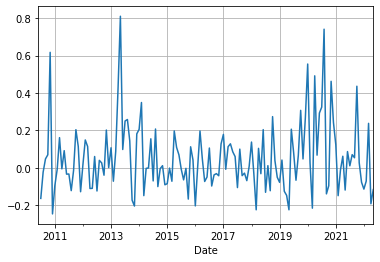

In [33]:
monthly_ret = df["Adj Close"].resample("M").ffill().pct_change()
monthly_ret.plot()
plt.grid()
plt.show()

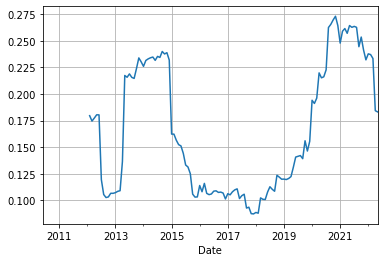

In [34]:
volat = monthly_ret.rolling(20).std()
volat.plot()
plt.grid()
plt.show()

## Ex 4.3

Calculate the correlation between the returns of the gold price (ticker 'GLD'), gold stocks (tickers 'NEM', 'FNV'), and gold ETF (ticker 'GDX').

In [35]:
# Your answer
df_gld = yf.download("GLD NEM FNV GDX")["Adj Close"]

gld_pct = df_gld.pct_change()
corr = gld_pct.corr()


[*********************100%***********************]  4 of 4 completed


In [36]:
corr

,FNV,GDX,GLD,NEM
FNV,1.000000,0.769320,0.613520,0.673581
GDX,0.769320,1.000000,0.751731,0.873606
GLD,0.613520,0.751731,1.000000,0.664906
NEM,0.673581,0.873606,0.664906,1.000000
